<a href="https://colab.research.google.com/github/Anilkumarurs/Deep-Learning/blob/main/Predicting_car_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Libraries & Capture Dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # library that uses Matplotlib underneath to plot graphs
import matplotlib.pyplot as plt #Matlab
from warnings import filterwarnings #ignore warnings from specified module
filterwarnings("ignore")


In [4]:
#Reading Dataset
data = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [5]:
#returns the first n rows for the object based on position
data.head()


,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [6]:
#printing information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   JobTitle             500 non-null    object 
 2   customer e-mail      500 non-null    object 
 3   country              500 non-null    object 
 4   gender               500 non-null    int64  
 5   age                  500 non-null    int64  
 6   BasePay              500 non-null    float64
 7   OvertimePay          500 non-null    float64
 8   OtherPay             500 non-null    float64
 9   Benefits             0 non-null      float64
 10  TotalPay             500 non-null    float64
 11  TotalPayBenefits     500 non-null    float64
 12  credit card debt     500 non-null    float64
 13  net worth            500 non-null    float64
 14  car purchase amount  500 non-null    float64
dtypes: float64(9), int64(2), object(4)
memor

In [7]:
#calculating the relationship between each column in the data set.
data.corr()[["car purchase amount"]].sort_values(["car purchase amount"])

,car purchase amount
gender,-0.066408
OvertimePay,-0.031566
OtherPay,-0.008536
TotalPay,0.006014
TotalPayBenefits,0.006014
credit card debt,0.028882
BasePay,0.037602
net worth,0.488580
age,0.633273
car purchase amount,1.000000


In [8]:
# Missing data check
data.isna().sum()

customer name            0
JobTitle                 0
customer e-mail          0
country                  0
gender                   0
age                      0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits               500
TotalPay                 0
TotalPayBenefits         0
credit card debt         0
net worth                0
car purchase amount      0
dtype: int64

In [9]:
# Dropping columns
car_df = data.drop(["customer name","customer e-mail","country","JobTitle","Benefits"],axis=1)


In [10]:
#Define X and Y
Y = car_df[["car purchase amount"]]
X = car_df.drop(["car purchase amount"],axis=1)
print(X.shape,Y.shape)


(500, 9) (500, 1)


In [11]:
#Pre-Processing
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
Y_scaled = mms.fit_transform(Y.values.reshape(-1,1))


In [12]:
print(X_scaled.shape,Y_scaled.shape)

(500, 9) (500, 1)


In [13]:
#Division of data in tarining and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_scaled,test_size=0.25,random_state=101)


In [14]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)


(375, 9) (375, 1) (125, 9) (125, 1)


In [15]:
#accuracy
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest)*100)

45.83596137667837


In [16]:

#ANN Model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim=9, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                250       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 926 (3.62 KB)
Trainable params: 926 (3.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#defining the loss function
#Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#epoch-number times that the learning algorithm will work through the entire training dataset.
model.compile(optimizer='adam',loss='mean_squared_error')
epochs_hist = model.fit(xtrain,ytrain,epochs=10,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 1s 45ms/step - loss: 0.6104 - val_loss: 0.4582
Epoch 2/10
6/6 [==============================] - 0s 12ms/step - loss: 0.3666 - val_loss: 0.2512
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.1848 - val_loss: 0.1120
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0818 - val_loss: 0.0495
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0479 - val_loss: 0.0441
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0490 - val_loss: 0.0475
Epoch 7/10
6/6 [==============================] - 0s 10ms/step - loss: 0.0459 - val_loss: 0.0383
Epoch 8/10
6/6 [==============================] - 0s 10ms/step - loss: 0.0356 - val_loss: 0.0290
Epoch 9/10
6/6 [==============================] - 0s 10ms/step - loss: 0.0284 - val_loss: 0.0248
Epoch 10/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0256 - val_loss: 0.0228


In [20]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

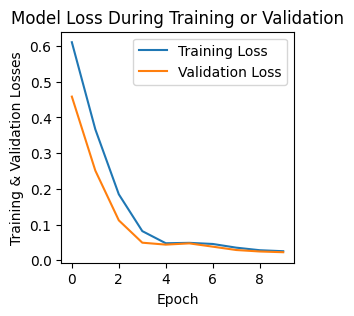

In [21]:
#Visualization
plt.figure(figsize=(3,3),dpi=100)
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [24]:
#Predictions with some random data provided
X_random_sample = np.array([[0,42,167411.18,0,400184.25,567595.43,567595.43,11609.38091,238961.2505]])
y_predict = model.predict(X_random_sample)

1/1 [==============================] - 0s 169ms/step


In [25]:
#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
#function
def performance(model,X_train,y_train,y_pred,y_test):
    print('Train Score:',model.score(xtrain,ytrain))
    print('Test Score:',r2_score(ytest,y_pred))
    print('')
    print('MSE:',mean_squared_error(ytest,y_pred))
    print('MAE:',mean_absolute_error(ytest,y_pred))


In [27]:
#Fitting the model
#Linear Regression establishes a relationship between dependent variable (Y)
#one or more independent variables (X) using a best fit straight line (also known as regression line).
lr = LinearRegression()
lr.fit(xtrain,ytrain)

#The predicted data
lr_pred = lr.predict(xtest)
performance(lr,xtrain,ytrain,lr_pred,ytest)

Train Score: 0.666373022883424
Test Score: 0.4833359479160346

MSE: 0.010542845566519393
MAE: 0.08267223296769366


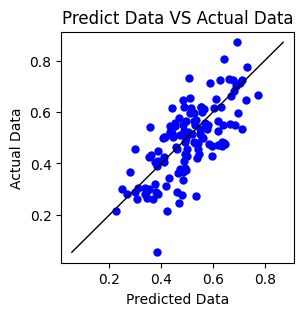

In [28]:
#Comparision & Visualisation
plt.figure(figsize=(3,3),dpi=100)
plt.scatter(lr_pred,ytest,c='blue',marker='o',s=25)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],c='black',lw=1)

plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.title('Predict Data VS Actual Data')
plt.show()

In [29]:
#Fitting the model
#Ridge Regression is a technique used when the data suffers from multicollinearity
#independent variables are highly correlated.
#amount of shrinkage (or constraint) that will be implemented in the equation.
# the larger is the alpha, the higher is the smoothness constraint.
ridge = Ridge(alpha = 1)
ridge.fit(xtrain,ytrain)

#The predicted data
ridge_pred = ridge.predict(xtest)
performance(ridge,xtrain,ytrain,ridge_pred,ytest)

Train Score: 0.6614677775077044
Test Score: 0.49423458296133316

MSE: 0.010320452261421083
MAE: 0.08219794340251466


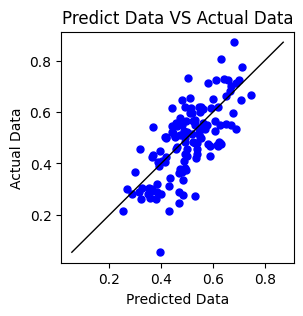

In [30]:
#Comparision & Visualisation
plt.figure(figsize=(3,3),dpi=100)
plt.scatter(ridge_pred,ytest,c='blue',marker='o',s=25)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],c='black',lw=1)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.title('Predict Data VS Actual Data')
plt.show()
